In [199]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [200]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('data/train.csv', dtype={'id':'int', 'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])

In [201]:
(df.memory_usage() / (1024 * 1024)).sum()

29.573829650878906

In [202]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1150000.0


In [203]:
df.dtypes
#Aclaracion; los valores que que eran int en las descripciones, en el caso de no tener valor (NAN),
#da error si se los quiere asignar como enteros, ya que no se puede representar la ausencia de valor
#en int.

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio    

| Columnas de texto | Tipo | Comentarios | 
|:-|:-|:- | 
|`titulo`| Texto | El título de la propiedad publicada |
|`descripcion`| Texto | La descripción de la propieadad publicada |

| Localización | Tipo | Comentarios | 
|:-|:-|:- | 
|`direccion` | String | La dirección (calle y número) de la propiedad |
|`ciudad`| String |  La ciudad de la propiedad |
|`idzona`| Int |  Una zona es una parte de un ciudad |
|`provincia`| String  | La provincia donde está localizada la propiedad|
|`lat`| Float | Latitud |
|`lng`| Float | Longitud|

| Cualidad | Tipo | Comentarios | 
|:-|:-|:- | 
| `tipodepropiedad` | Categórico (String) | Casa, apartamento, terreno, etc|
| `metrostotales` | Int | Metros totales de la propiedad | 
| `metroscubiertos` | Int | Metros cubiertos de la propiedad |
| `antiguedad` | Int | Antigüedad de la propiedad |
| `habitaciones` | Int | Cantidad de habitaciones |
| `garages` | Int | Cantidad de garages |
| `banos` | Int | Cantidad de baños|

| Fecha/Amenities/Otros | Tipo | Comentarios | 
|:-|:-|:- | 
| `fecha` | Date | Fecha de publicación |
| `gimnasio` |  Bool | Si el edificio o la propiedad tiene un gimnasio |
| `usosmultiples` |  Bool |Si el edificio o la propiedad tiene un SUM |
| `piscina` |  Bool | Si el edificio o la propiedad tiene un piscina |
| `escuelascercanas` |  Bool |Si la propiedad tiene escuelas cerca |
| `centroscomercialescercanos` | Bool | Si la propiedad tiene centros comerciales cerca |

| Variable dependiente | Tipo | Comentarios | 
|:-|:-|:- | 
| `precio` | Float | Valor de publicación de la propiedad en pesos mexicanos |

In [204]:
df.shape

(240000, 23)

In [205]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [206]:
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.252500e+07


In [207]:
df.drop(['lat','lng'], axis=1, inplace=True)

In [208]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,80.0,80.0,23533.0,2015-08-23,False,False,False,False,False,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,268.0,180.0,24514.0,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,144.0,166.0,48551.0,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,63.0,67.0,53666.0,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,95.0,95.0,47835.0,2016-06-07,False,False,False,False,False,1150000.0


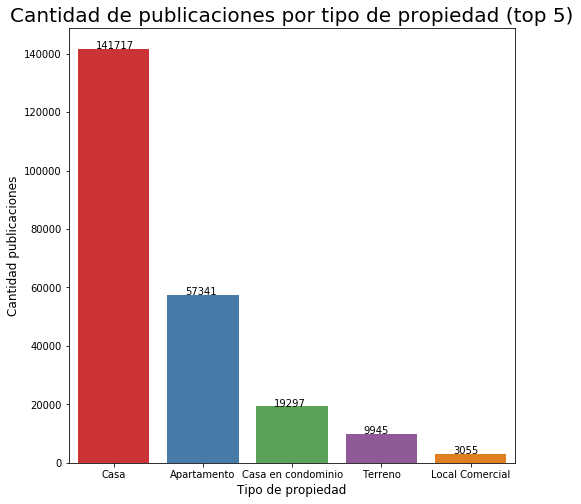

In [209]:
#Top 5 tipos propiedades mas publicadas
top5_prop = df['tipodepropiedad'].value_counts().head(5)
plt.subplots(figsize=(8,8))
grafico_top5_prop=sns.barplot(x=top5_prop.index,y=top5_prop.values,orient='v',palette="Set1",order = top5_prop.index)
grafico_top5_prop.set_title("Cantidad de publicaciones por tipo de propiedad (top 5)",fontsize=20)
grafico_top5_prop.set_xlabel("Tipo de propiedad",fontsize=12)
grafico_top5_prop.set_ylabel("Cantidad publicaciones",fontsize=12)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(top5_prop.values):
    plt.text(xlocs[i] - 0.2, v + 0.01, str(v),size='medium')
plt.savefig('top_5_tipos_propiedades', bbox_inches = 'tight')

In [210]:
#Voy a graficar la evolucion de la cantidad de publicaciones a lo largo de los años

In [211]:
df['date'] = df['fecha'].dt.date
df['date'].head()

0    2015-08-23
1    2013-06-28
2    2015-10-17
3    2012-03-09
4    2016-06-07
Name: date, dtype: object

In [212]:
df['date'].min()

datetime.date(2012, 1, 1)

In [213]:
df['date'].max()

datetime.date(2016, 12, 31)

In [214]:
#El dt.to_period con el parametro 'M' convierte un datetime a año-mes
#df['año_mes'] = df['fecha'].dt.to_period('M')


In [215]:
df['id'].nunique()

240000

In [216]:
#df1 = df.groupby('año_mes')['id'].count()
df1 = df.groupby('date')['id'].count()
df1.head()

date
2012-01-01     74
2012-01-02     69
2012-01-03    137
2012-01-04     52
2012-01-05     31
Name: id, dtype: int64

<Figure size 432x288 with 0 Axes>

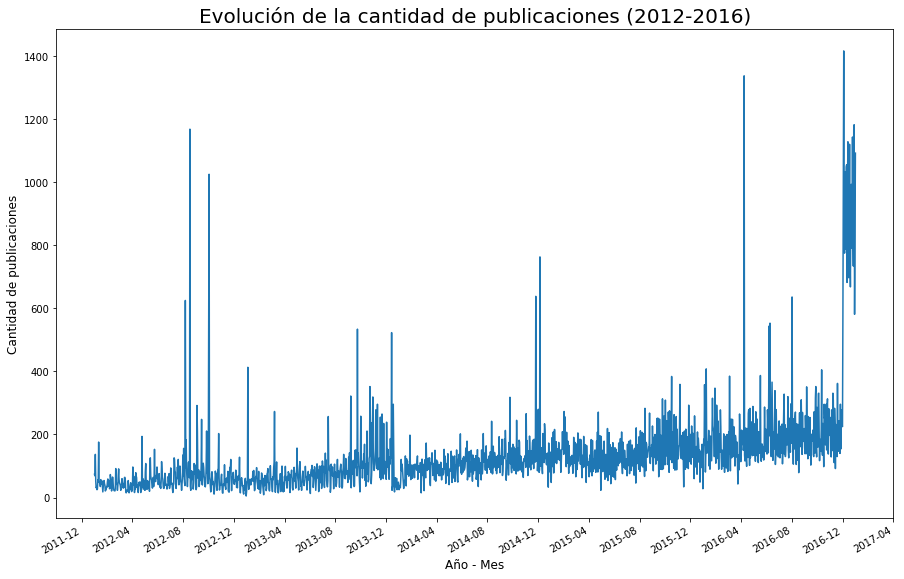

In [217]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(df1.index, df1.values)
plt.title('Evolución de la cantidad de publicaciones (2012-2016)', fontsize=20)
plt.xlabel('Año - Mes', fontsize=12)
plt.ylabel('Cantidad de publicaciones', fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate() # Rotation
plt.savefig('evolucion_cant_public.png', bbox_inches = 'tight')
plt.show()

In [218]:
#Voy a analizar la evolucion de las publicaciones a lo largo de los años del top 5 de tipos.
#Primero filtro el dataframe para quedarme solo con los 5 tipos mas importantes
lista_top5_tipos = top5_prop.index.tolist()

In [219]:
lista_top5_tipos

['Casa', 'Apartamento', 'Casa en condominio', 'Terreno', 'Local Comercial']

In [220]:
df_filtrado = df[df['tipodepropiedad'].isin(lista_top5_tipos)]

In [221]:
df_filtrado['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Bodega comercial                      0
Casa uso de suelo                     0
Departamento Compartido               0
Duplex                                0
Edificio                              0
Huerta                                0
Inmuebles productivos urbanos         0
Garage                                0
Hospedaje                             0
Lote                                  0
Nave industrial                       0
Oficina comercial                     0
Otros                                 0
Quinta Vacacional                     0
Rancho                                0
Terreno comercial                     0
Terreno industrial                    0
Villa                                 0
Local en centro comercial             0
Name: tipodepropiedad, dtype: int64

In [222]:
df_filtrado_group = df_filtrado.groupby(['date','tipodepropiedad'])['id'].count().to_frame()

In [223]:
df_evolucion_top5_group = df_filtrado_group.unstack()
df_evolucion_top5_group.head()

id                                                  
tipodepropiedad Apartamento   Casa Casa en condominio Terreno Local Comercial
date                                                                         
2012-01-01             14.0   41.0               15.0     1.0             NaN
2012-01-02             14.0   42.0                9.0     2.0             NaN
2012-01-03             10.0  116.0                7.0     2.0             NaN
2012-01-04             15.0   30.0                5.0     1.0             NaN
2012-01-05              5.0   17.0                6.0     1.0             NaN

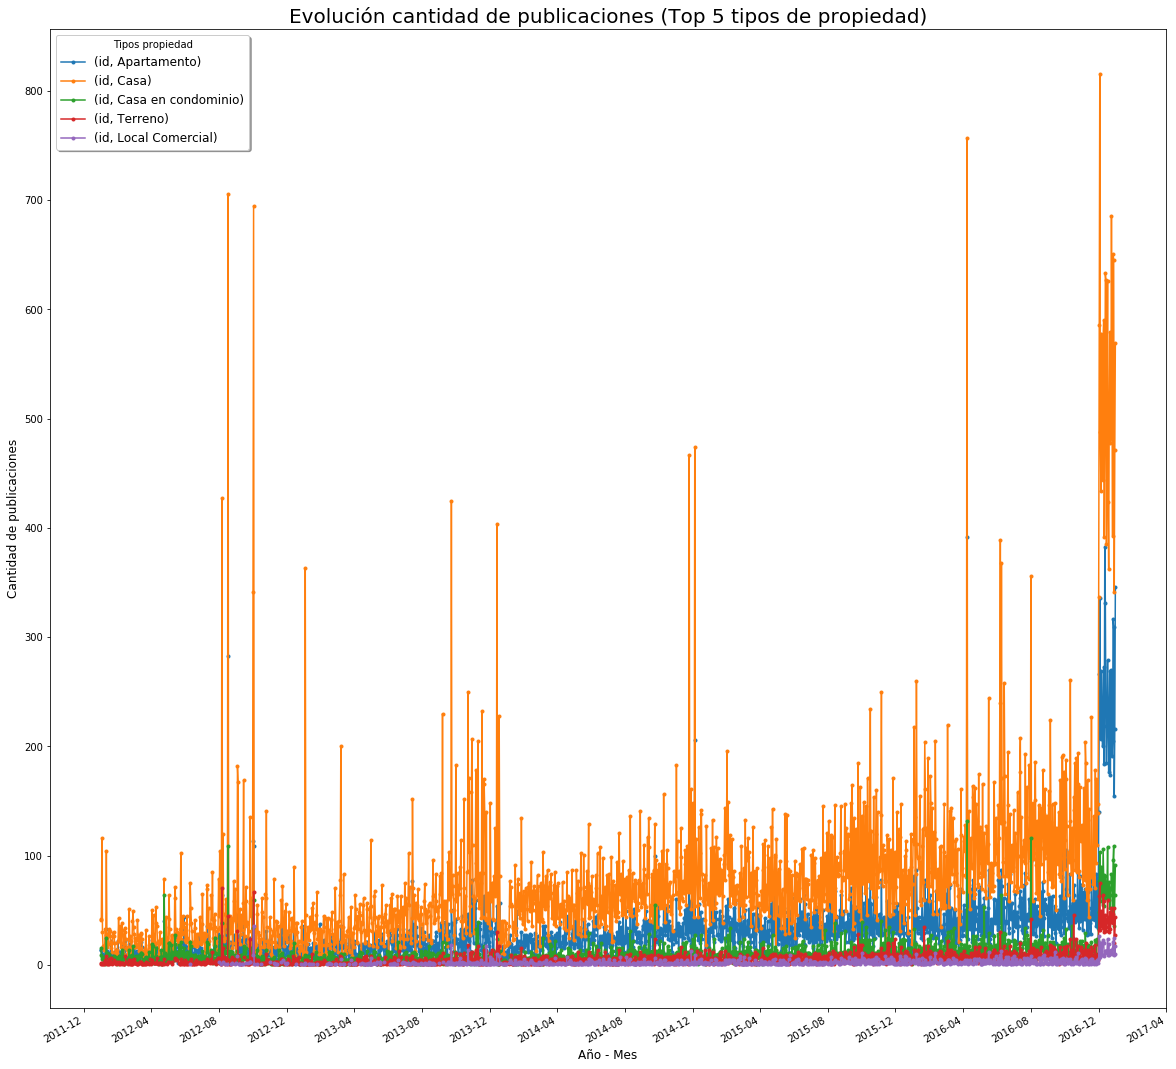

In [224]:
grafico_evolucion = df_evolucion_top5_group.plot(kind = 'line', figsize=(20,20), style='.-');

grafico_evolucion.set_ylabel("Cantidad de publicaciones", size = 12)
grafico_evolucion.set_xlabel("Año - Mes", size = 12)
grafico_evolucion.set_title("Evolución cantidad de publicaciones (Top 5 tipos de propiedad)", size = 20)
grafico_evolucion.legend(title = 'Tipos propiedad', fontsize = 'large',loc='upper left' , shadow=True, ncol=1)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate() # Rotation
plt.savefig('evolucion_cant_public_top5.png', bbox_inches = 'tight')

In [225]:
serie_provincias_top10 = df['provincia'].value_counts().head(10)

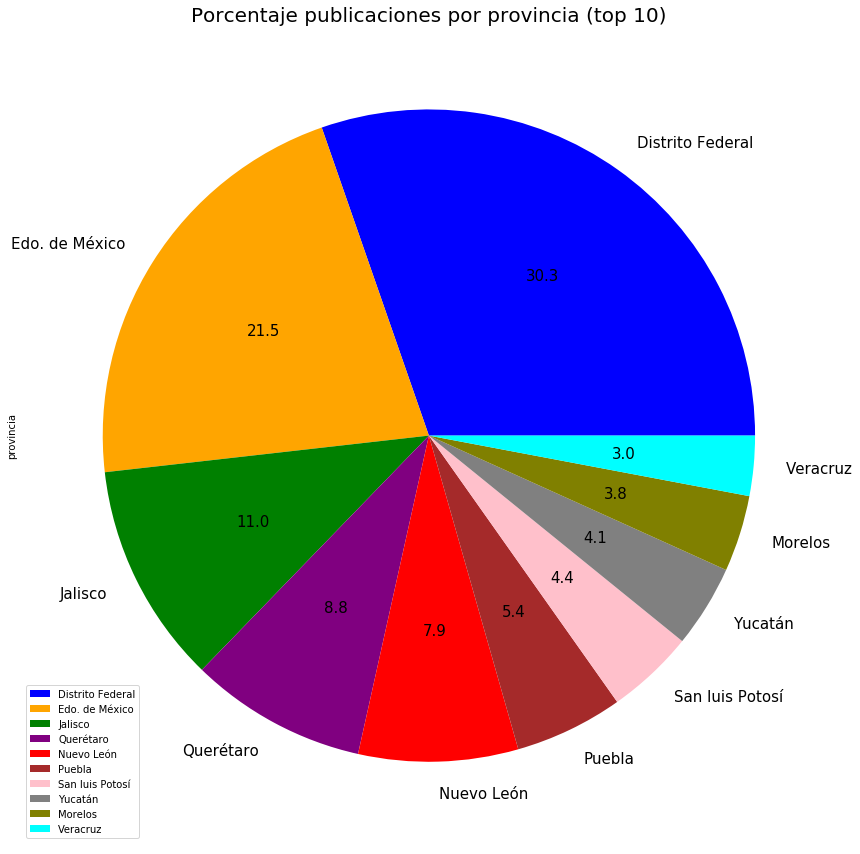

In [226]:
serie_provincias_top10.plot.pie(y='mass', figsize=(15, 15),fontsize=15, autopct='%.1f', legend= True,\
                               colors = ['blue', 'orange','green','purple','red','brown','pink','gray','olive','cyan'])
plt.title('Porcentaje publicaciones por provincia (top 10)', fontsize=20)
plt.savefig('porcentaje_provincias_top10.png', bbox_inches = 'tight')

In [227]:
#Del top 5 pronvincias, cuales son las principales ciudades con más publicaciones?
lista_provincias_top5 = serie_provincias_top10.head(5).index
len(lista_provincias_top5)

5

In [228]:
df_top5_provincias = df[df['provincia'].isin(lista_provincias_top5)]

In [229]:
df_top5_provincias['provincia'].value_counts().head(10)

Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Zacatecas               0
Guerrero                0
Guanajuato              0
Durango                 0
Colima                  0
Name: provincia, dtype: int64

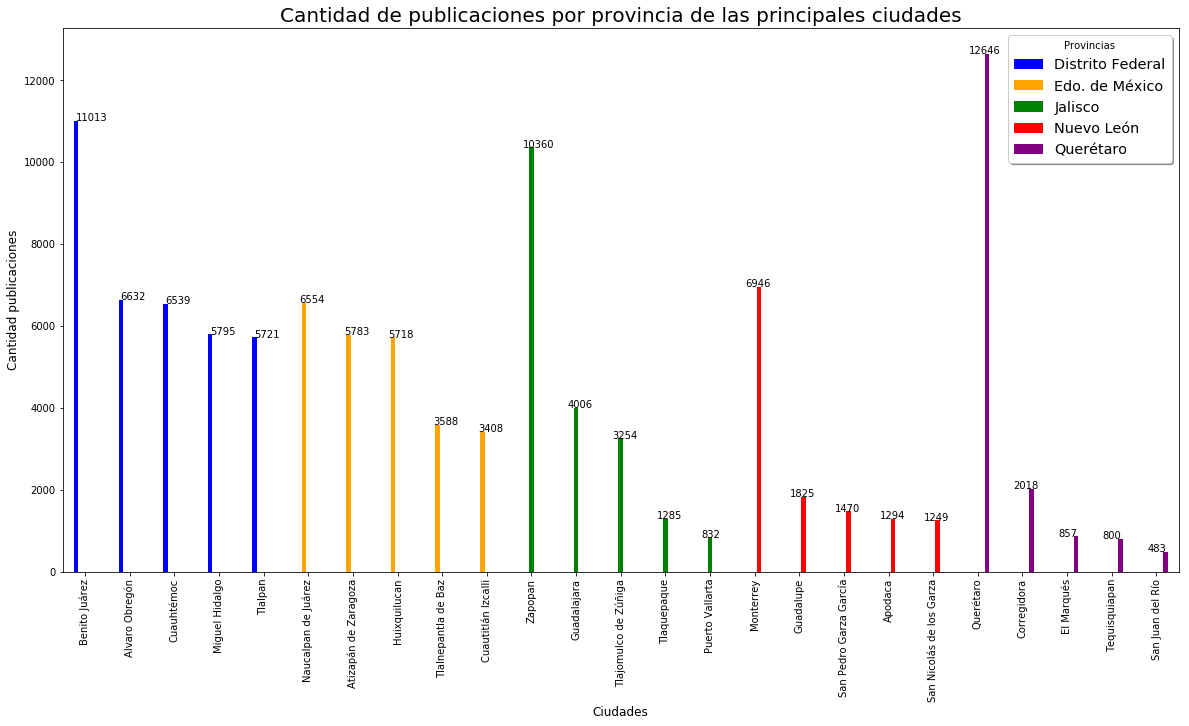

In [230]:
#Tiene los xticks desfasados pero ya intente por horas arreglarlo y no pude, luego de 2000 soluciones de stackoverflow jaja
df_top5_provincias = df_top5_provincias[['provincia','ciudad']]
#El reset index es necesario porque sino se genera otro indice repetido igual al primero (Distrito federal.)\
# se puede no usarlo si se agrega al groupby(level=0, group_keys=False) el ultimo parametro
serie_prov_ciud = df_top5_provincias.groupby(['provincia','ciudad']).size().groupby(level=0).nlargest(5).reset_index(drop=True,level=0)
serie_unstack = serie_prov_ciud.unstack(level=0)

ax = serie_unstack.plot(kind='bar',figsize=(20,10), color = ['blue', 'orange','green','red','purple'])
ax.set_title("Cantidad de publicaciones por provincia de las principales ciudades",fontsize=20)
ax.set_xlabel("Ciudades",fontsize=12)
ax.set_ylabel("Cantidad publicaciones",fontsize=12)
ax.legend(title = 'Provincias', fontsize = 'x-large',loc='upper right' , shadow=True, ncol=1)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(serie_prov_ciud.values):
    plt.text(xlocs[i] - 0.2, v + 0.01, str(v),size='medium')
    
plt.savefig('cant_public_por_provincia_ciudades', bbox_inches = 'tight')

In [231]:
#Voy a analizar en que meses/dia de la semana hay mas publicaciones
df['dia_semana'] = df['fecha'].dt.weekday
df['mes'] = df['fecha'].dt.month

In [232]:
df_mes_dia = df[['dia_semana','mes']]
df_mes_dia.head()

,dia_semana,mes
0,6,8
1,4,6
2,5,10
3,4,3
4,1,6


In [233]:
matriz = df_mes_dia.groupby(['dia_semana','mes']).size().unstack(level=1)
matriz

mes,1,2,3,4,5,6,7,8,9,10,11,12
dia_semana,,,,,,,,,,,,
0,2438,2054,2082,2588,2567,2876,2930,4321,3843,3766,3177,5257
1,2500,2486,2584,2691,2834,3219,3136,3246,3634,4798,3714,6402
2,1886,2043,2152,2286,2363,2382,2599,2558,2768,3493,2959,6247
3,2457,1841,1726,1726,1784,2323,1971,2199,2275,2647,2438,4833
4,2729,2178,2917,3688,2682,2763,3304,4330,3677,3833,3952,7341
5,2183,1700,1791,1981,2091,1860,1741,2177,2576,2788,2284,7682
6,1816,1421,1480,1506,1741,1798,1829,2066,1849,1981,2701,4465


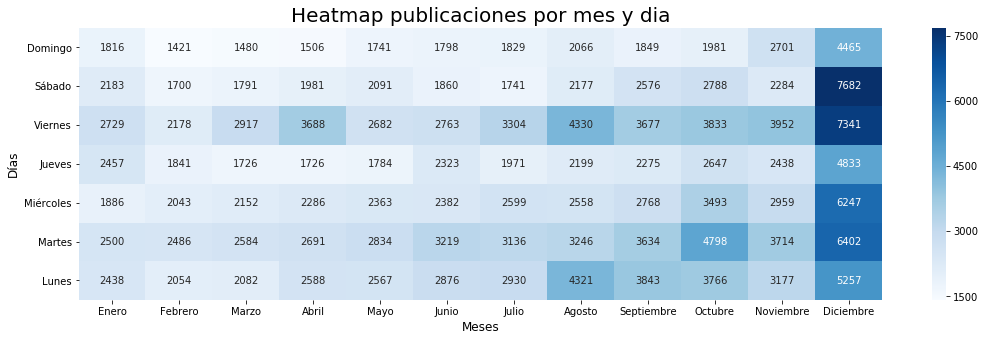

In [234]:
fig, ax =plt.subplots(figsize=(18,5))
etiquetaY=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
etiquetaX=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
heatmap_public = sns.heatmap(matriz,yticklabels=etiquetaY,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot = True);
heatmap_public.invert_yaxis() 
heatmap_public.set_title("Heatmap publicaciones por mes y dia",fontsize=20)
heatmap_public.set_xlabel("Meses",fontsize=12)
heatmap_public.set_ylabel("Días",fontsize=12)
plt.savefig('heatmap_publicaciones_mes_día', bbox_inches = 'tight')

In [235]:
#No se puede hacer el mismo grafico para horas del dia versus dia de la semana,
#ya que no nos dan la fecha exacta.


In [236]:
df['año'] = df['fecha'].dt.year

Graficos a hacer:
- Stacked bar plot del top 5 de propiedades segun el año que muestre la cantidad de publicaciones


In [237]:
#Cantidad de nulos de precios y metrostotales
df['precio'].isnull().sum()

0

In [238]:
df['metrostotales'].isnull().sum()

51467

In [239]:
#Para hacer la cuenta bien, deberia dropear esos registros
df_limpio = df.dropna(subset=['metrostotales'])
len(df_limpio)

188533

In [240]:
df_limpio.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,date,dia_semana,mes,año
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,False,False,False,False,False,2273000.0,2015-08-23,6,8,2015


In [241]:
#Un chequeo basico de que sean todos mayores a 0
print("Cantidad de precios negativos",(df_limpio['precio']<0).sum())
print("Cantidad de metros totales negativos",(df_limpio['metrostotales']<0).sum())

Cantidad de precios negativos 0
Cantidad de metros totales negativos 0


In [242]:
df_limpio = df_limpio[['año','tipodepropiedad','precio','metrostotales']]
df_limpio.head()

,año,tipodepropiedad,precio,metrostotales
0,2015,Apartamento,2273000.0,80.0
1,2013,Casa en condominio,3600000.0,180.0
2,2015,Casa,1200000.0,166.0
3,2012,Casa,650000.0,67.0
4,2016,Apartamento,1150000.0,95.0


In [243]:
#Me voy a quedar solo con el top 5 de tipos de propiedades
lista = top5_prop.index.tolist()
lista

['Casa', 'Apartamento', 'Casa en condominio', 'Terreno', 'Local Comercial']

In [244]:
df_limpio = df_limpio[df['tipodepropiedad'].isin(lista)]
df_limpio['tipodepropiedad'].value_counts()

/home/franco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Casa                             125061
Apartamento                       29348
Casa en condominio                17148
Terreno                            8675
Local Comercial                    2205
Bodega comercial                      0
Casa uso de suelo                     0
Departamento Compartido               0
Duplex                                0
Edificio                              0
Huerta                                0
Inmuebles productivos urbanos         0
Garage                                0
Hospedaje                             0
Lote                                  0
Nave industrial                       0
Oficina comercial                     0
Otros                                 0
Quinta Vacacional                     0
Rancho                                0
Terreno comercial                     0
Terreno industrial                    0
Villa                                 0
Local en centro comercial             0
Name: tipodepropiedad, dtype: int64

In [245]:
df_limpio_grouped = df_limpio.groupby(['año','tipodepropiedad'])\
                             .agg({'precio':['sum'],'metrostotales':['sum']})
df_limpio_grouped.head()

precio metrostotales
                                  sum           sum
año  tipodepropiedad                               
2012 Apartamento         5.766824e+08       40976.0
     Casa                2.228858e+10     2193299.0
     Casa en condominio  5.567451e+09      396129.0
     Local Comercial     1.871741e+08       12936.0
     Terreno             1.287249e+09      248489.0

In [246]:
level0 = df_limpio_grouped.columns.get_level_values(0)
level1 = df_limpio_grouped.columns.get_level_values(1)
df_limpio_grouped.columns = level0 + "_" + level1

In [247]:
df_limpio_grouped.head()

precio_sum  metrostotales_sum
año  tipodepropiedad                                    
2012 Apartamento         5.766824e+08            40976.0
     Casa                2.228858e+10          2193299.0
     Casa en condominio  5.567451e+09           396129.0
     Local Comercial     1.871741e+08            12936.0
     Terreno             1.287249e+09           248489.0

In [248]:
df_limpio_grouped['precio_m2'] = df_limpio_grouped['precio_sum']/df_limpio_grouped['metrostotales_sum']

In [249]:
df_limpio_grouped.head()

precio_sum  metrostotales_sum     precio_m2
año  tipodepropiedad                                                  
2012 Apartamento         5.766824e+08            40976.0  14073.662632
     Casa                2.228858e+10          2193299.0  10162.127276
     Casa en condominio  5.567451e+09           396129.0  14054.641942
     Local Comercial     1.871741e+08            12936.0  14469.243970
     Terreno             1.287249e+09           248489.0   5180.305587

In [250]:
df_limpio_grouped = df_limpio_grouped['precio_m2']
tabla = df_limpio_grouped.unstack()

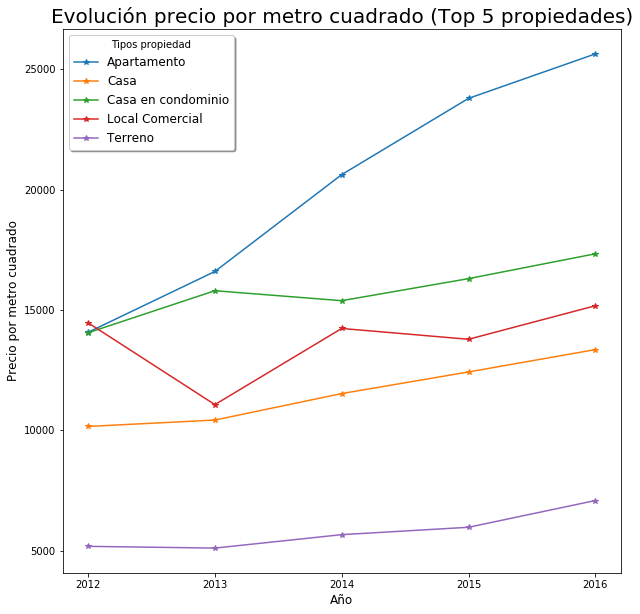

In [251]:
grafico_evolucion = tabla.plot(kind = 'line', figsize=(10,10), style='-*');
grafico_evolucion.set_ylabel("Precio por metro cuadrado", size = 12)
grafico_evolucion.set_xlabel("Año", size = 12)
grafico_evolucion.set_title("Evolución precio por metro cuadrado (Top 5 propiedades)", size = 20)
grafico_evolucion.legend(title = 'Tipos propiedad', fontsize = 'large',loc='upper left' , shadow=True, ncol=1)
grafico_evolucion.set_xticks(tabla.index)
plt.savefig('evo_precio_m2.png', bbox_inches = 'tight')

In [252]:
len(df[(df['tipodepropiedad'].isin(['Local Comercial']) & (df['año'] == 2012))])

109

In [253]:
len(df[(df['tipodepropiedad'].isin(['Local Comercial']) & (df['año'] == 2013))])

328

In [254]:
len(df[(df['tipodepropiedad'].isin(['Local Comercial']) & (df['año'] == 2014))])

525

In [255]:
len(df[(df['tipodepropiedad'].isin(['Local Comercial']) & (df['año'] == 2015))])

718

In [256]:
len(df[(df['tipodepropiedad'].isin(['Local Comercial']) & (df['año'] == 2016))])

1375

In [257]:
#Voy a analizar la antiguedad de las propiedades
df['antiguedad'].value_counts().head()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
Name: antiguedad, dtype: int64

In [258]:
df['antiguedad'].max()

80.0

In [259]:
df['antiguedad'].min()

0.0

In [260]:
df['antiguedad'].nunique()

78

In [261]:
#Voy a hacer un stacked bar plot  de cantidad de publicaciones
#por año del top 5 de tipos de propiedades
lista_top5_tipos
df_stacked = df[['año','tipodepropiedad']]
df_stacked = df_stacked[df_stacked['tipodepropiedad'].isin(lista_top5_tipos)]
df_stacked = df_stacked.groupby(['año','tipodepropiedad']).size()
df_stacked = df_stacked.unstack(level=1)
df_stacked.head()

tipodepropiedad,Apartamento,Casa,Casa en condominio,Local Comercial,Terreno
año,,,,,
2012,5071,13728,2835,109,951
2013,6716,19366,1960,328,1108
2014,9698,24299,3042,525,1540
2015,12780,29800,4095,718,2133
2016,23076,54524,7365,1375,4213


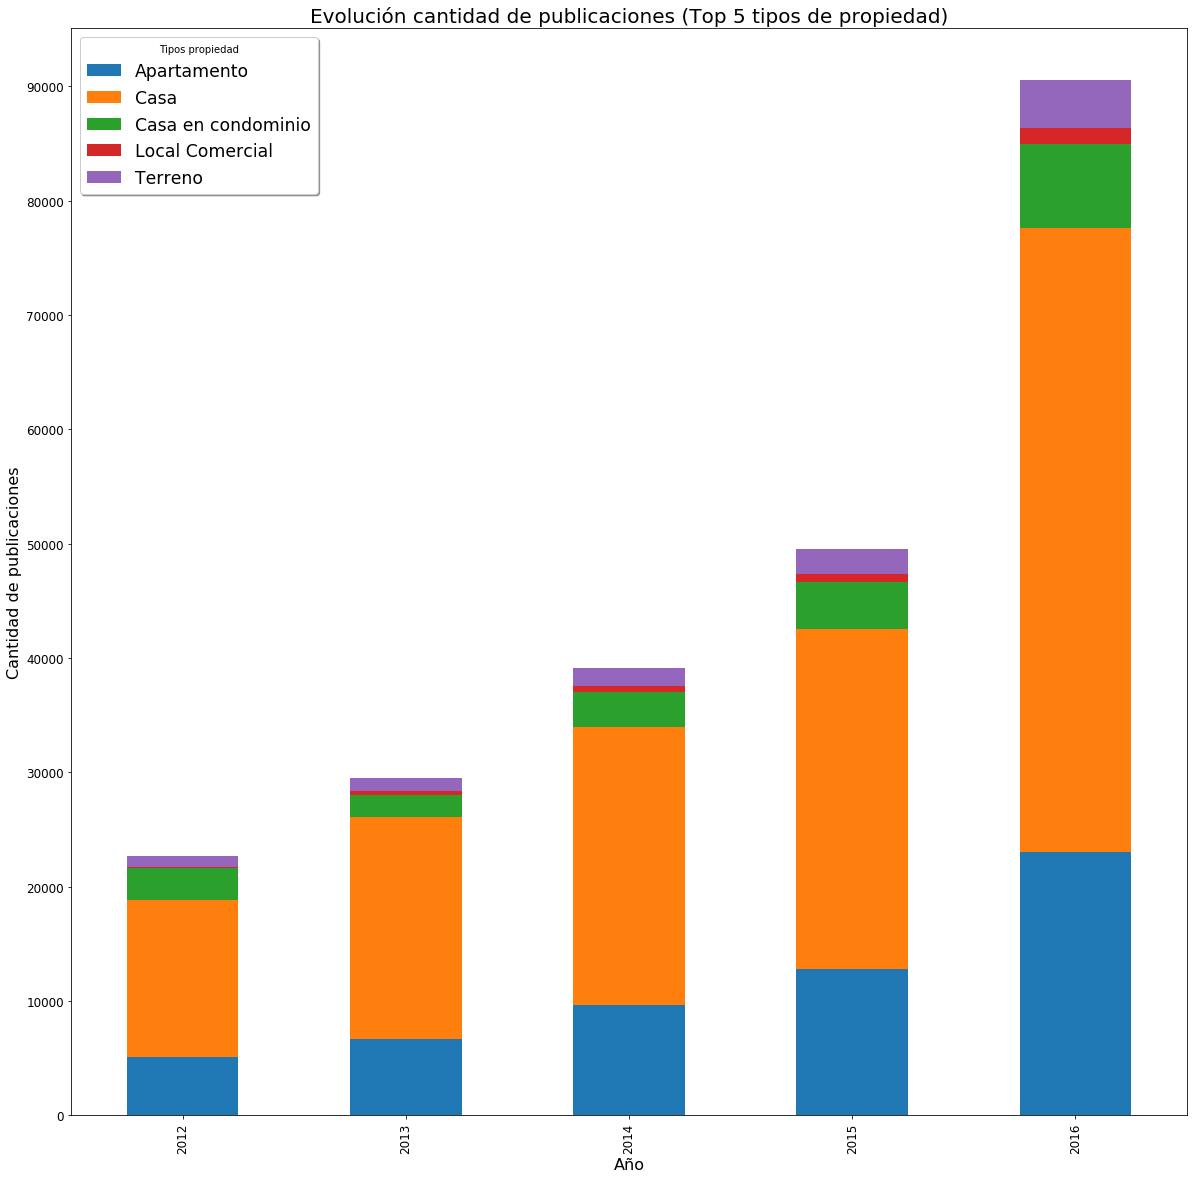

In [262]:
grafico_comparacion = df_stacked.plot(kind = 'bar', figsize=(20,20),stacked=True, fontsize=12, yticks = range(0,100000,10000));

grafico_comparacion.set_ylabel("Cantidad de publicaciones", size = 16)
grafico_comparacion.set_xlabel("Año", size = 16)
grafico_comparacion.set_title("Evolución cantidad de publicaciones (Top 5 tipos de propiedad)", size = 20)
grafico_comparacion.legend(title = 'Tipos propiedad', fontsize = 'xx-large',loc='upper left' , shadow=True, ncol=1)
#ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#plt.gcf().autofmt_xdate() # Rotation
plt.savefig('evolucion_cant_public_top5_stackedbar.png', bbox_inches = 'tight')

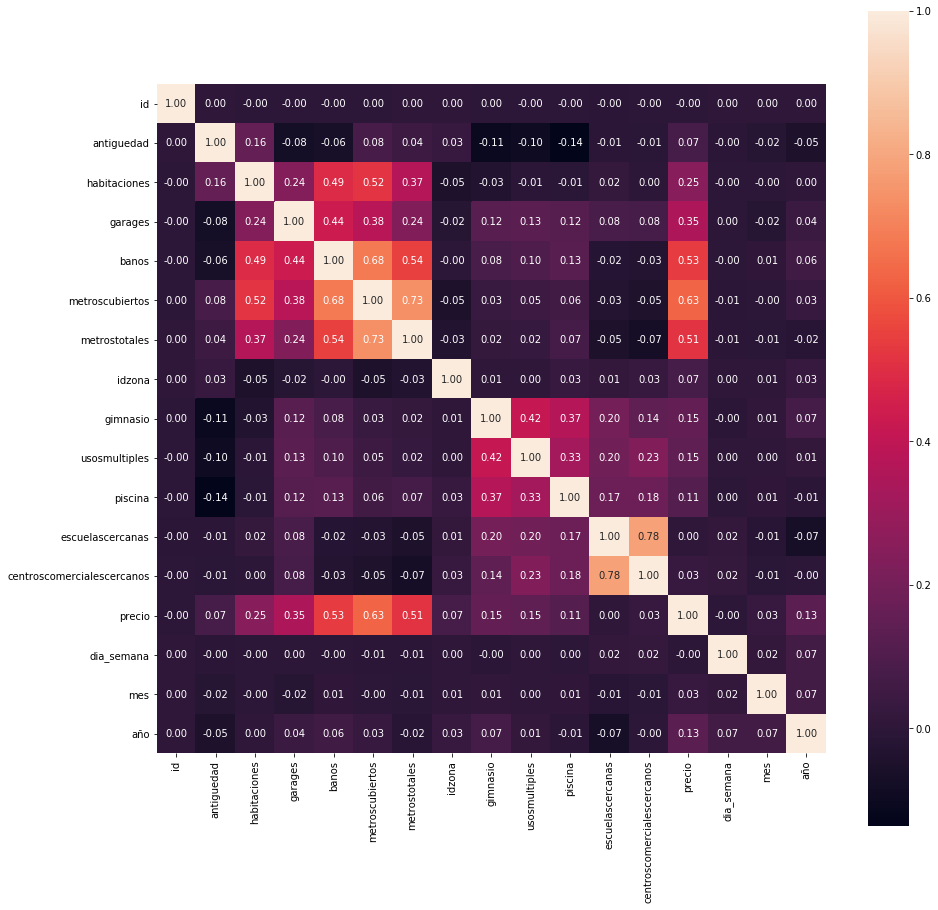

In [263]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [264]:
df.corr()['precio'].sort_values(ascending=False).head()

precio             1.000000
metroscubiertos    0.629187
banos              0.534060
metrostotales      0.514411
garages            0.348543
Name: precio, dtype: float64

In [265]:
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio                               float64
date                                  object
dia_semana

Text(0, 0.5, 'Frecuencia')

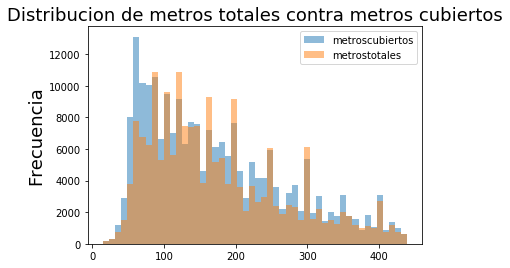

In [266]:
g = df[["metroscubiertos","metrostotales"]].plot.hist(bins=50,alpha=0.5)
g.set_title("Distribucion de metros totales contra metros cubiertos", fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

No deberia ser metroscubiertos <= metrostotales?

In [267]:
df['metrostotales'].max()

439.0

In [268]:
df['metroscubiertos'].max()

439.0

In [269]:
len(df[df['metrostotales']<df['metroscubiertos']])

70295

In [270]:
df['metrostotales'].isnull().sum()

51467

In [271]:
df['metroscubiertos'].isnull().sum()

17400